## Customer Relationship Management

![salesforce-customer_journey_map](salesforce-customer_journey_map.jpg)

### Main Topics
- Customer Lifecycle/journey/funnel
- Communication
- New Customers Processes
- Churn Management
- Cross-sell - Up-sell
- Customer Segmentation Processes

### Key Performance Indicators
- Customer Acquisiton Rate 
- Customer Retention Rate
- Customer Churn Rate
- Conversion Rate
- Growth Rate

### Cohort Analysis
Analysis of a group of people with common characteristics on KPIs.

### RFM 
#### Recency
How recent was the customer's last purchase ?

#### Frequency
How often did this customer make a purchase in a given period ?

#### Monetary
How much money did the customer spend in a given period ?

#### RFM Segments
![AdvantagesAndInefficaciesOfRFMSegmentation1](AdvantagesAndInefficaciesOfRFMSegmentation1.png)


### RFM SEGMENTATION

### Importing Modules and Dataset

In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: "%.2f" % x)

In [263]:
data2010 = pd.read_excel("online_retail_II.xlsx", sheet_name="Year 2009-2010")
data2011 = pd.read_excel("online_retail_II.xlsx", sheet_name="Year 2010-2011")

In [264]:
data = data2010.append(data2011)
data.reset_index(drop = True, inplace=True)

### Exploratory Data Analysis

### Check Data

In [265]:
def check(df, head = 5):
    print("**********************************HEAD**********************************")
    print(df.head(head))
    print("**********************************TAIL**********************************")
    print(df.tail(head))
    print("**********************************TYPES**********************************")
    print(df.dtypes)
    print("**********************************SHAPE**********************************")
    print(df.shape)
    print("**********************************NA**********************************")
    print(df.isnull().sum())
    print("**********************************QUANTILES**********************************")
    print(df.describe([0, 0.05, 0.5, 0.95]))

In [266]:
check(data)

**********************************HEAD**********************************
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95     13085.00  United Kingdom  
1 2009-12-01 07:45:00   6.75     13085.00  United Kingdom  
2 2009-12-01 07:45:00   6.75     13085.00  United Kingdom  
3 2009-12-01 07:45:00   2.10     13085.00  United Kingdom  
4 2009-12-01 07:45:00   1.25     13085.00  United Kingdom  
**********************************TAIL**********************************
        Invoice StockCode                      Description  Quantity  \
1

### Grab Columns

In [267]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [268]:
cats,nums,cards = grab_col_names(data)

Observations: 1067371
Variables: 8
cat_cols: 0
num_cols: 4
cat_but_car: 4
num_but_cat: 0


In [269]:
cards

['Invoice', 'StockCode', 'Description', 'Country']

In [270]:
nums

['Quantity', 'InvoiceDate', 'Price', 'Customer ID']

In [271]:
def num_summary(df, col, plot=False):
    quantiles = [0.01, 0.05, 0.1, 0.25, 0.50, 0.75, 0.95, 0.99]
    print(df[col].describe(quantiles).T)
    print("*****************************************************")
    if plot:
        df[col].hist()
        plt.xlabel(col)
        plt.title(col)
        plt.show(block=True)
        

count   1067371.00
mean          9.94
std         172.71
min      -80995.00
1%           -3.00
5%            1.00
10%           1.00
25%           1.00
50%           3.00
75%          10.00
95%          30.00
99%         100.00
max       80995.00
Name: Quantity, dtype: float64
*****************************************************


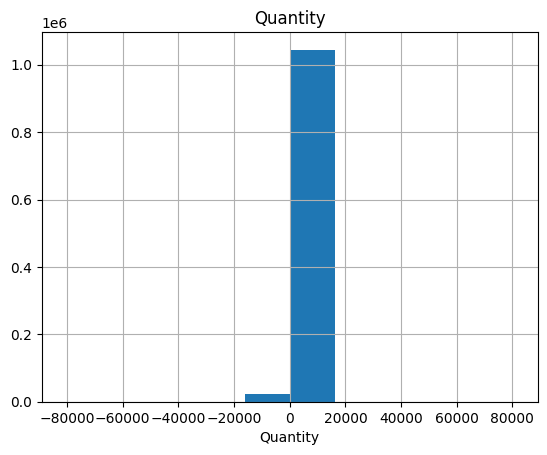

count                 1067371
unique                  47635
top       2010-12-06 16:57:00
freq                     1350
first     2009-12-01 07:45:00
last      2011-12-09 12:50:00
Name: InvoiceDate, dtype: object
*****************************************************


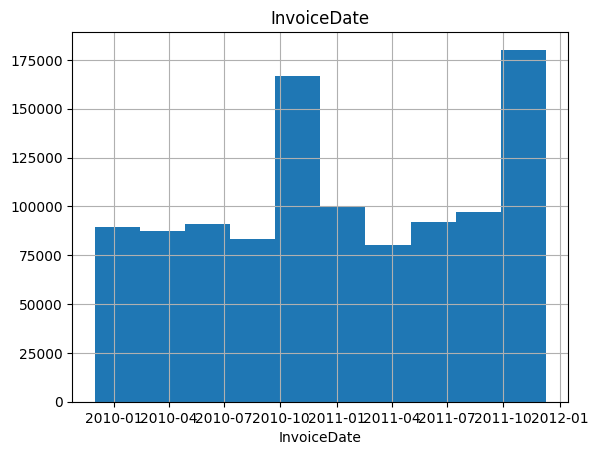

count   1067371.00
mean          4.65
std         123.55
min      -53594.36
1%            0.21
5%            0.42
10%           0.65
25%           1.25
50%           2.10
75%           4.15
95%           9.95
99%          18.00
max       38970.00
Name: Price, dtype: float64
*****************************************************


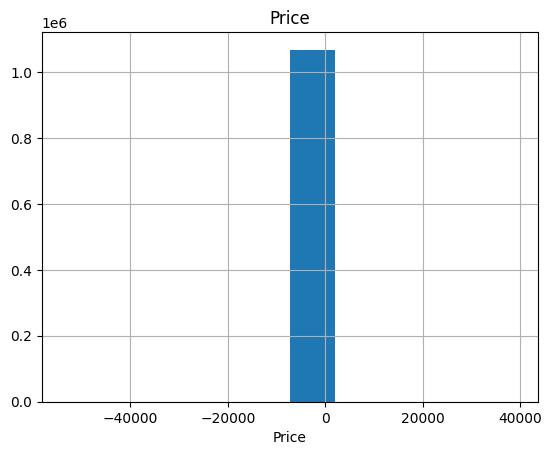

count   824364.00
mean     15324.64
std       1697.46
min      12346.00
1%       12422.00
5%       12681.00
10%      12971.00
25%      13975.00
50%      15255.00
75%      16797.00
95%      17911.00
99%      18207.00
max      18287.00
Name: Customer ID, dtype: float64
*****************************************************


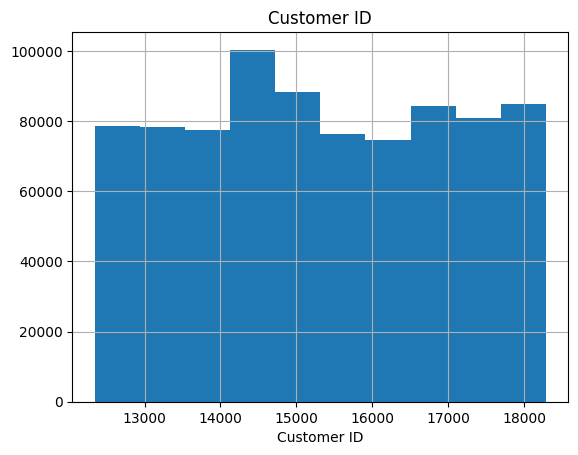

In [272]:
for col in nums:
    num_summary(data,col,True)

### Handling Missing Values

There are missing values in two columns which are Description and Customer ID. The number of missing values in the Description column is not significant amount and the situation of being missing values in the unique Customer ID column can not be accepted, thus we drop these missing values for better analysis.  

In [273]:
data.dropna(inplace=True)

In [274]:
data.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

### Handling Outliers

  There are significantly huge value of outliers in Quantity and Price columns, so we need to fix that problem by measuring IQR and make the data between Q1 - 1.5IQR and Q3 + 1.5IQR.
  We do not take any action about the values in quantity and price which are lower than zero because they may be returned products and/or promoted products and our main target is not analyze the customers intent like in market basket analysis. 

In [275]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,824364.00,12.41,188.98,-80995.00,2.00,5.00,12.00,80995.00
Price,824364.00,3.68,70.24,0.00,1.25,1.95,3.75,38970.00
Customer ID,824364.00,15324.64,1697.46,12346.00,13975.00,15255.00,16797.00,18287.00


<AxesSubplot: xlabel='Quantity'>

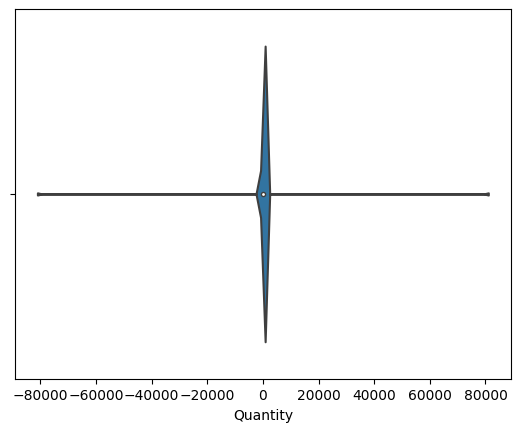

In [276]:
sns.violinplot(x = data.Quantity, data = data)

<AxesSubplot: xlabel='Price'>

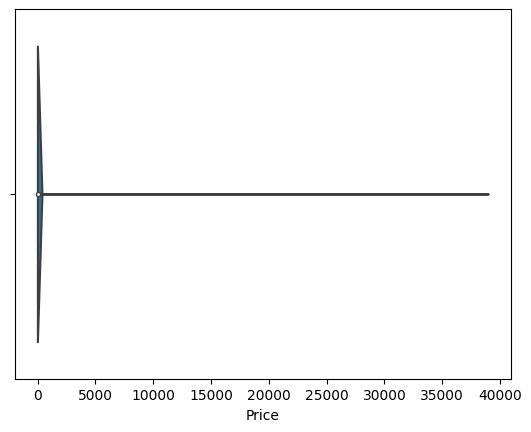

In [277]:
sns.violinplot(x = data.Price, data = data)

In [278]:
IQR_quantity = (data.Quantity.quantile(0.75) - data.Quantity.quantile(0.25)) * 1.5
IQR_price = (data.Price.quantile(0.75) - data.Price.quantile(0.25)) * 1.5

In [279]:
print(data.Quantity.min(),"-", data.Quantity.max())

-80995 - 80995


In [280]:
print(data.Price.min(),"-", data.Price.max())

0.0 - 38970.0


In [281]:
quantity_lower_limit = data.Quantity.quantile(0.25) - IQR_quantity
quantity_upper_limit = data.Quantity.quantile(0.75) + IQR_quantity
price_lower_limit = data.Price.quantile(0.25) - IQR_price
price_upper_limit = data.Price.quantile(0.75) + IQR_price

In [282]:
data = data[(data.Quantity > quantity_lower_limit) & (data.Quantity < quantity_upper_limit)
           & (data.Price > price_lower_limit) & (data.Price < price_upper_limit)]

In [283]:
print(data.Quantity.min(),"-", data.Quantity.max())

-12 - 26


In [284]:
print(data.Price.min(),"-", data.Price.max())

0.0 - 7.49


count   698892.00
mean         7.10
std          6.80
min        -12.00
1%          -2.00
5%           1.00
10%          1.00
25%          2.00
50%          5.00
75%         12.00
95%         24.00
99%         25.00
max         26.00
Name: Quantity, dtype: float64
*****************************************************


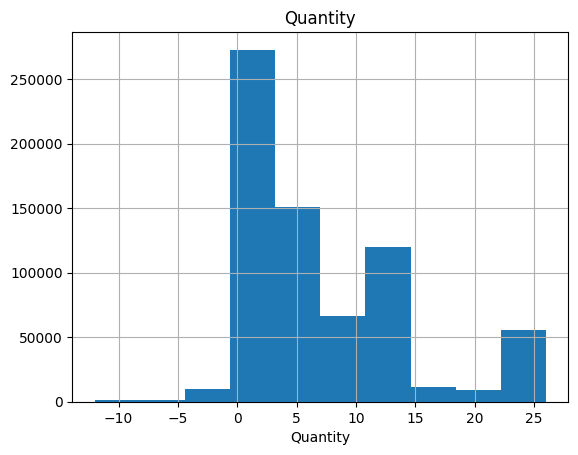

count                  698892
unique                  36366
top       2011-11-14 15:27:00
freq                      460
first     2009-12-01 07:45:00
last      2011-12-09 12:50:00
Name: InvoiceDate, dtype: object
*****************************************************


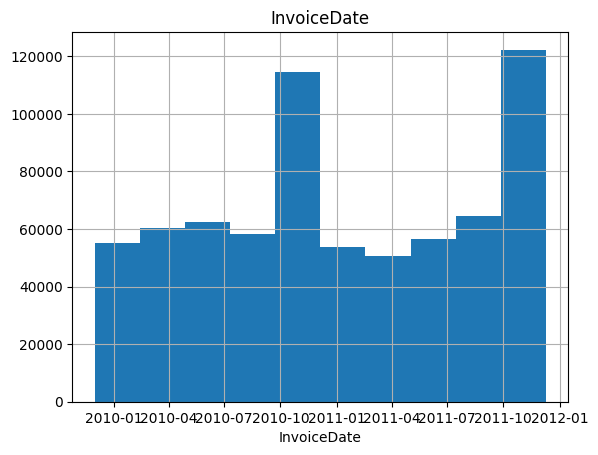

count   698892.00
mean         2.28
std          1.60
min          0.00
1%           0.29
5%           0.42
10%          0.55
25%          1.25
50%          1.69
75%          2.95
95%          5.95
99%          6.95
max          7.49
Name: Price, dtype: float64
*****************************************************


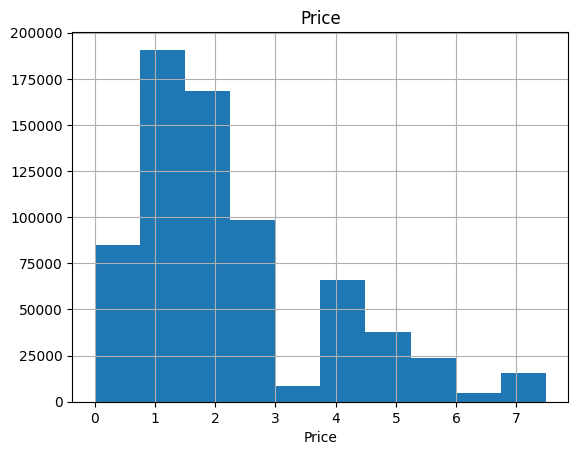

count   698892.00
mean     15355.88
std       1695.34
min      12346.00
1%       12431.00
5%       12684.00
10%      13001.00
25%      14002.00
50%      15311.00
75%      16829.00
95%      17912.00
99%      18210.00
max      18287.00
Name: Customer ID, dtype: float64
*****************************************************


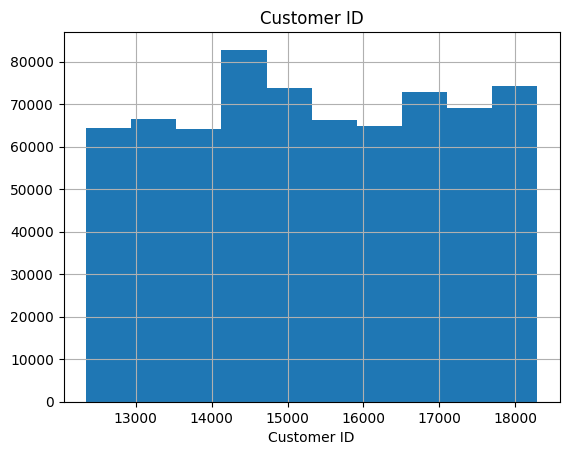

In [285]:
for col in nums:
    num_summary(data,col,True)

<AxesSubplot: xlabel='Quantity'>

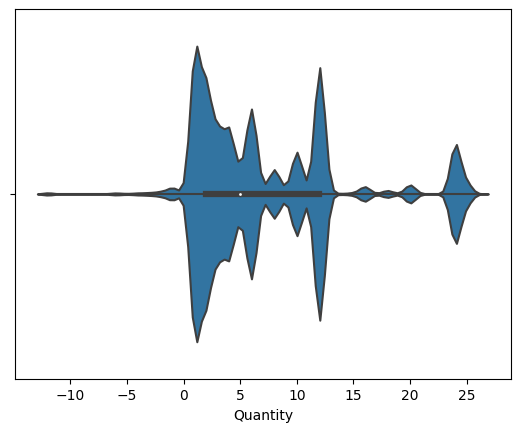

In [286]:
sns.violinplot(x = data.Quantity, data = data)

<AxesSubplot: xlabel='Price'>

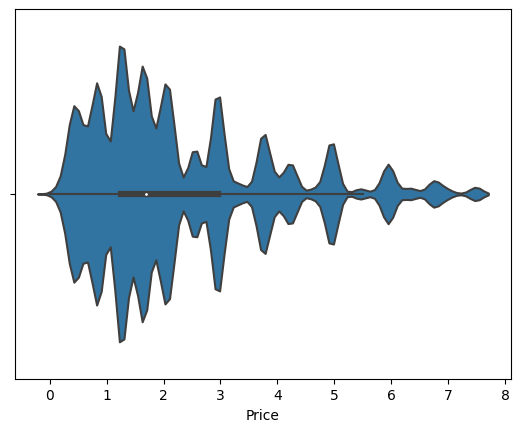

In [287]:
sns.violinplot(x = data.Price, data = data)

### Data Preprocessing & Analyzing

In [288]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom


In [289]:
# Number of unique invoices
data.Invoice.nunique()

38924

In [290]:
# Number of unique products
data.Description.nunique()

4838

In [291]:
# The top 10 products are sold most
data.groupby("Description")["Quantity"].count().sort_values(ascending=False).head(10)

Description
WHITE HANGING HEART T-LIGHT HOLDER    4303
JUMBO BAG RED RETROSPOT               2265
ASSORTED COLOUR BIRD ORNAMENT         2256
REX CASH+CARRY JUMBO SHOPPER          2148
LUNCH BAG  BLACK SKULL.               2030
PARTY BUNTING                         1950
HOME BUILDING BLOCK WORD              1942
BAKING SET 9 PIECE RETROSPOT          1930
LUNCH BAG SPACEBOY DESIGN             1886
STRAWBERRY CERAMIC TRINKET BOX        1876
Name: Quantity, dtype: int64

In [292]:
#The top 10 countries where most transactions occured
data.groupby("Country")["Invoice"].apply(lambda x : x.nunique()).sort_values(ascending=False).head(10)

Country
United Kingdom    35354
Germany             960
France              641
EIRE                578
Netherlands         163
Belgium             163
Spain               147
Portugal             99
Switzerland          94
Australia            91
Name: Invoice, dtype: int64

In [293]:
# Number of unique customers
data["Customer ID"].nunique()

5708

In [294]:
# The top 10 countries which customers belong in
data.groupby("Country")["Customer ID"].apply(lambda x : x.nunique()).sort_values(ascending=False).head(10)

Country
United Kingdom    5201
Germany            106
France              93
Spain               36
Belgium             29
Portugal            23
Switzerland         22
Netherlands         21
Sweden              18
Italy               17
Name: Customer ID, dtype: int64

### RFM Metrics and Scores

#### Functionalize the process

In [198]:
def create_rfm(dataframe, csv=False):

    # Data Preparation
    dataframe["TotalPrice"] = dataframe["Quantity"] * dataframe["Price"]
    dataframe.dropna(inplace=True)
    

    # Measuring The RFM Metrics
    today_date = data.InvoiceDate.max() +  dt.timedelta(days=15)
    rfm = dataframe.groupby('Customer ID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days,
                                                'Invoice': lambda num: num.nunique(),
                                                "TotalPrice": lambda price: price.sum()})
    rfm.columns = ['recency', 'frequency', "monetary"]
    rfm = rfm[(rfm['monetary'] > 0)]

    # Measuring The RFM Scores
    rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
    rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
    rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

    # Creating RFM Score Column with Recency and Frequency
    rfm["RFM_SCORE"] = (rfm['recency_score'].astype(str) +
                        rfm['frequency_score'].astype(str))


    # Naming The Segments with Regex
    seg_map = {
        r'[1-2][1-2]': 'hibernating',
        r'[1-2][3-4]': 'at_risk',
        r'[1-2]5': 'cant_loose',
        r'3[1-2]': 'about_to_sleep',
        r'33': 'need_attention',
        r'[3-4][4-5]': 'loyal_customers',
        r'41': 'promising',
        r'51': 'new_customers',
        r'[4-5][2-3]': 'potential_loyalists',
        r'5[4-5]': 'champions'
    }

    rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)
    rfm = rfm[["recency", "frequency", "monetary", "segment"]]
    rfm.index = rfm.index.astype(int)

    if csv:
        rfm.to_csv("rfm.csv")

    return rfm



#### Exporting the data

In [199]:
df = data.copy()
rfm_new = create_rfm(df, csv=True)

In [297]:
rfm_new.head()

,recency,frequency,monetary,segment
Customer ID,,,,
12346,445,14,356.37,cant_loose
12347,16,8,4538.90,champions
12348,263,4,312.36,at_risk
12349,33,4,2610.84,potential_loyalists
12350,324,1,294.40,hibernating
